In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
# Upload the data
df = pd.read_csv("FINAL.csv")
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,0.543860,...,73,135,208,29,20,28,43,91,304,2582160
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125000,...,0,3,3,2,0,0,0,1,2,449115
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0.613636,...,213,301,514,111,54,38,78,113,438,29592695
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,0.570000,...,142,431,573,346,75,66,169,145,1197,5115492
4,LaMarcus Aldridge,C,35,BRK,52,46,1348,280,592,0.472973,...,38,198,236,98,22,58,54,94,704,17628340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Delon Wright,PG,28,SAC,126,78,3496,480,1036,0.463320,...,130,408,538,556,202,60,166,150,1290,9000000
537,Thaddeus Young,PF,32,CHI,68,23,1652,370,662,0.558912,...,168,255,423,291,74,40,137,152,823,13545000
538,Trae Young,PG,22,ATL,63,63,2125,487,1112,0.437950,...,38,207,245,594,53,12,261,111,1594,6571800
539,Cody Zeller,C,28,CHO,48,21,1005,181,324,0.558642,...,119,209,328,86,27,17,51,121,451,15415730


In [8]:
pos = "C"
player = "Ivica Zubac"

In [9]:
df1 = df.loc[df["Pos"]==pos]

In [10]:
x = df1.loc[df1["Player"]==player]
x = x.drop(columns=["Player", "Tm", "Pos", "Salary"])

y = df1.drop(columns=["Player", "Tm", "Pos", "Salary"])

In [11]:
df1["Distance"] = euclidean_distances(x, y)[0]
df1

<ipython-input-11-96d404c9aa79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Distance"] = euclidean_distances(x, y)[0]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Distance
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0.613636,...,301,514,111,54,38,78,113,438,29592695,292.058532
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,0.570000,...,431,573,346,75,66,169,145,1197,5115492,1067.254431
4,LaMarcus Aldridge,C,35,BRK,52,46,1348,280,592,0.472973,...,198,236,98,22,58,54,94,704,17628340,530.342144
8,Jarrett Allen,C,22,CLE,126,90,3728,596,964,0.618257,...,870,1262,212,64,180,200,192,1612,3909902,2725.621514
21,Deandre Ayton,C,22,PHO,69,69,2115,430,687,0.625910,...,499,727,99,41,81,103,196,997,10018200,821.019491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Robert Williams,C,23,BOS,52,13,985,186,258,0.720930,...,225,358,94,43,91,52,105,417,2029920,746.613760
533,James Wiseman,C,19,GSW,39,27,836,191,368,0.519022,...,171,226,26,11,36,60,121,448,8730240,898.844856
534,Christian Wood,C,25,HOU,41,41,1326,329,640,0.514062,...,319,395,71,34,48,80,88,860,13015874,528.208360
539,Cody Zeller,C,28,CHO,48,21,1005,181,324,0.558642,...,209,328,86,27,17,51,121,451,15415730,707.129435


In [14]:
df1 = df1.sort_values(by="Distance", ascending=True).reset_index(drop=True)
df1[1:6]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Distance
1,Mason Plumlee,C,30,DET,56,56,1499,234,381,0.614173,...,374,519,202,43,50,105,186,581,8000000,192.689079
2,Daniel Gafford,C,22,WAS,108,22,1582,308,450,0.684444,...,274,462,58,52,150,82,196,760,1517981,210.791453
3,Isaiah Stewart,C,19,DET,68,14,1455,226,409,0.552567,...,294,453,59,39,86,67,184,537,3121080,257.454919
4,Tony Bradley,C,23,OKC,84,16,1368,262,394,0.664975,...,308,478,74,30,60,66,122,600,3542060,274.881726
5,Jakob Poeltl,C,25,SAS,69,51,1845,265,430,0.616279,...,328,547,134,47,123,83,172,593,8101852,278.991301


In [4]:
# Create the input variables
X = df1.drop(columns=["Player", "Tm", "Pos", "Salary"])

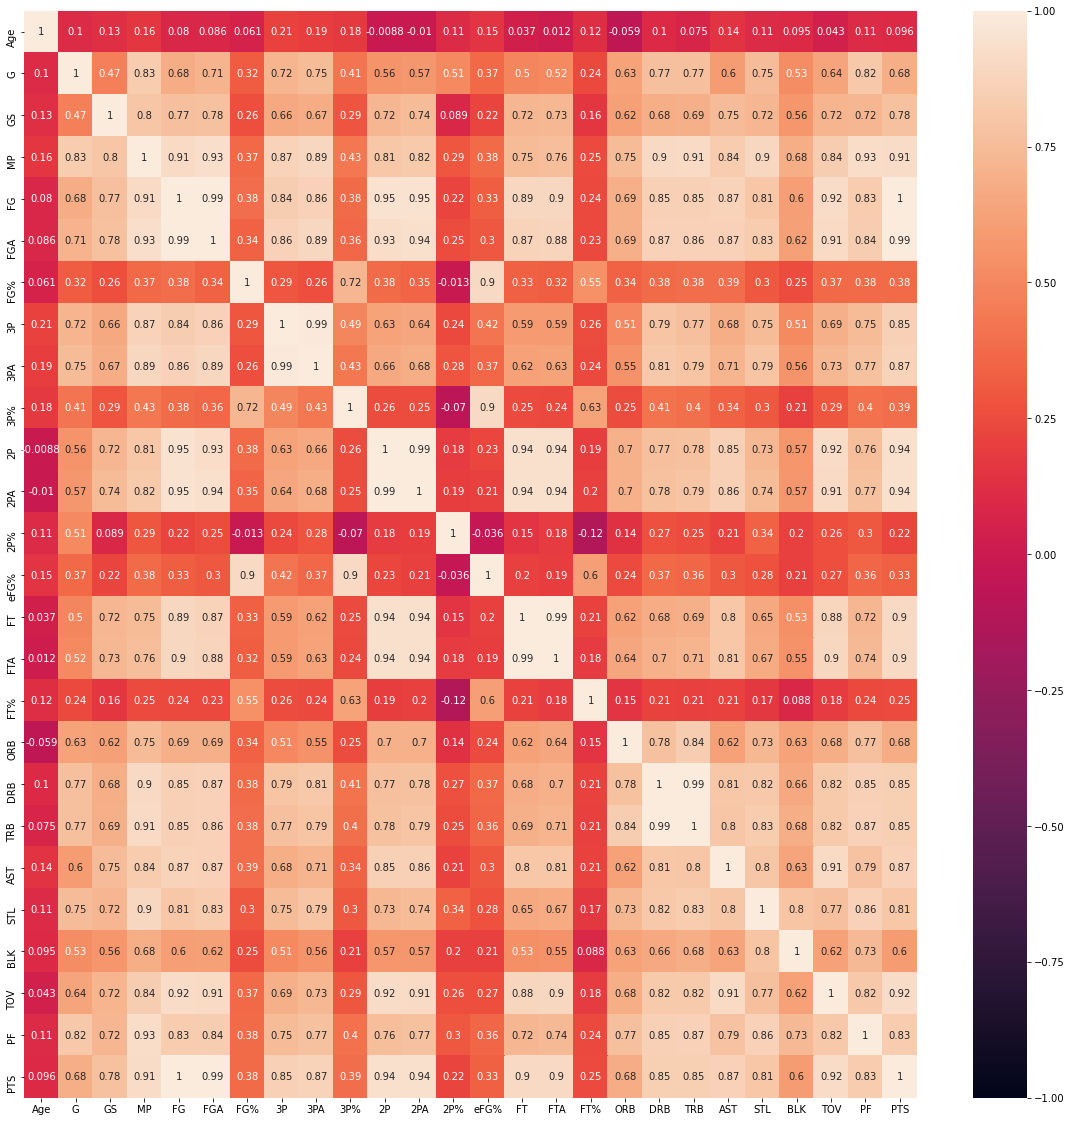

In [6]:
corrMatrix = X.corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True)
plt.show()

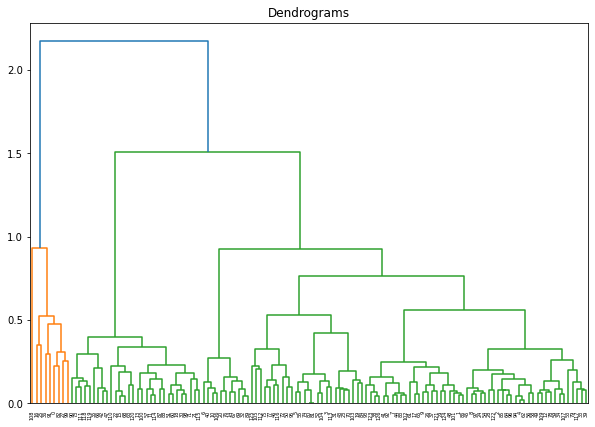

In [12]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Xscaled, method='ward'))

In [8]:
# Create the clustering model
#clustering = AgglomerativeClustering(n_clusters=int((len(X)/3))).fit(X)
clustering = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward", compute_distances=True).fit(X)
Counter(clustering.labels_)

Counter({0: 75, 1: 40, 2: 12})

In [18]:
len(clustering.children_)

126

In [9]:
len(clustering.distances_)

126

In [15]:
len(clustering.labels_)

127

In [14]:
len(df1)

127

In [19]:
df1["Label"] = clustering.labels_
df1

<ipython-input-19-2c8a5e937266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Label"] = clustering.labels_


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Label
5,Ty-Shon Alexander,SG,22,PHO,15,0,47,3,12,0.250000,...,8,10,6,0,1,3,2,9,449115,0
6,Nickeil Alexander-Walker,SG,22,NOP,46,13,1007,192,458,0.419214,...,131,144,102,47,22,69,88,508,3113160,0
7,Grayson Allen,SG,25,MEM,50,38,1259,173,414,0.417874,...,141,160,108,46,8,48,71,532,2545320,0
23,Dwayne Bacon,SG,25,ORL,72,50,1853,292,726,0.402204,...,193,224,93,45,5,46,103,788,1678854,1
28,Desmond Bane,SG,22,MEM,68,17,1519,234,499,0.468938,...,179,210,118,41,16,59,125,625,1936440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,Denzel Valentine,SG,27,CHI,62,3,1036,155,416,0.372596,...,173,197,105,30,7,42,70,406,4642800,0
499,Fred VanVleet,SG,26,TOR,52,52,1899,338,870,0.388506,...,188,220,328,87,37,95,119,1019,21250000,1
508,Lonnie Walker,SG,22,SAS,60,38,1522,256,609,0.420361,...,141,155,101,29,15,65,101,669,2895720,1
516,Quinndary Weatherspoon,SG,24,SAS,20,0,121,16,35,0.457143,...,8,11,8,8,2,10,18,46,449115,0


In [27]:
df_labeled = df1.loc[df1["Label"]==0]
df_labeled

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Label
5,Ty-Shon Alexander,SG,22,PHO,15,0,47,3,12,0.250000,...,8,10,6,0,1,3,2,9,449115,0
6,Nickeil Alexander-Walker,SG,22,NOP,46,13,1007,192,458,0.419214,...,131,144,102,47,22,69,88,508,3113160,0
7,Grayson Allen,SG,25,MEM,50,38,1259,173,414,0.417874,...,141,160,108,46,8,48,71,532,2545320,0
60,Avery Bradley,SG,30,HOU,54,12,1204,128,342,0.374269,...,98,114,92,42,6,56,110,346,5635000,0
69,Armoni Brooks,SG,22,HOU,20,5,520,78,192,0.406250,...,58,68,30,12,5,22,34,223,135362,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Matisse Thybulle,SG,23,PHI,65,8,1298,102,243,0.419753,...,94,124,63,105,71,32,127,255,2711280,0
489,Juan Toscano-Anderson,SG,27,GSW,53,16,1107,121,209,0.578947,...,205,234,150,41,26,61,111,301,943963,0
497,Denzel Valentine,SG,27,CHI,62,3,1036,155,416,0.372596,...,173,197,105,30,7,42,70,406,4642800,0
516,Quinndary Weatherspoon,SG,24,SAS,20,0,121,16,35,0.457143,...,8,11,8,8,2,10,18,46,449115,0


In [26]:
target_player = df_labeled.loc[df_labeled["Player"]=="Derrick White"]
target_player

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Label
519,Derrick White,SG,26,SAS,36,32,1064,186,453,0.410596,...,94,107,127,26,36,45,91,553,3516284,0


In [28]:
x = target_player.drop(columns=["Player", "Tm", "Pos", "Salary", "Label"])
y = df_labeled.drop(columns=["Player", "Tm", "Pos", "Salary", "Label"])

In [32]:
from sklearn.metrics.pairwise import euclidean_distances
#for index, row in df_labeled.iterrows():
df_labeled["distance"] = euclidean_distances(x, y)[0]
df_labeled

<ipython-input-32-72b24e98c976>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled["distance"] = euclidean_distances(x, y)[0]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Label,distance
5,Ty-Shon Alexander,SG,22,PHO,15,0,47,3,12,0.250000,...,10,6,0,1,3,2,9,449115,0,1318.756693
6,Nickeil Alexander-Walker,SG,22,NOP,46,13,1007,192,458,0.419214,...,144,102,47,22,69,88,508,3113160,0,129.533839
7,Grayson Allen,SG,25,MEM,50,38,1259,173,414,0.417874,...,160,108,46,8,48,71,532,2545320,0,236.507938
60,Avery Bradley,SG,30,HOU,54,12,1204,128,342,0.374269,...,114,92,42,6,56,110,346,5635000,0,320.471168
69,Armoni Brooks,SG,22,HOU,20,5,520,78,192,0.406250,...,68,30,12,5,22,34,223,135362,0,752.960210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Matisse Thybulle,SG,23,PHI,65,8,1298,102,243,0.419753,...,124,63,105,71,32,127,255,2711280,0,502.507889
489,Juan Toscano-Anderson,SG,27,GSW,53,16,1107,121,209,0.578947,...,234,150,41,26,61,111,301,943963,0,454.283097
497,Denzel Valentine,SG,27,CHI,62,3,1036,155,416,0.372596,...,197,105,30,7,42,70,406,4642800,0,245.979703
516,Quinndary Weatherspoon,SG,24,SAS,20,0,121,16,35,0.457143,...,11,8,8,2,10,18,46,449115,0,1228.886096


In [ ]:
player_label = df1.loc[df1["Player"]=="Eric Bledsoe"]["Label"].values[0]
player_label

In [ ]:
output = df1.loc[df1["Label"]==player_label].reset_index().drop(columns=["index"])
output

In [ ]:
for index, row in output.iterrows():
    print(row["Player"], index)